###   Question 1 - Tesla Reset_Index Head   ###


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


###   Question 2 - Webscrape and Tail   ###


,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


###   Question 3 - Extract Gamestop Stock Data with yFinance   ###


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


###   Question 4 - Webscrape GME Revenue Data   ###


,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


###   Question 5: Plot Tesla Stock Graph   ###


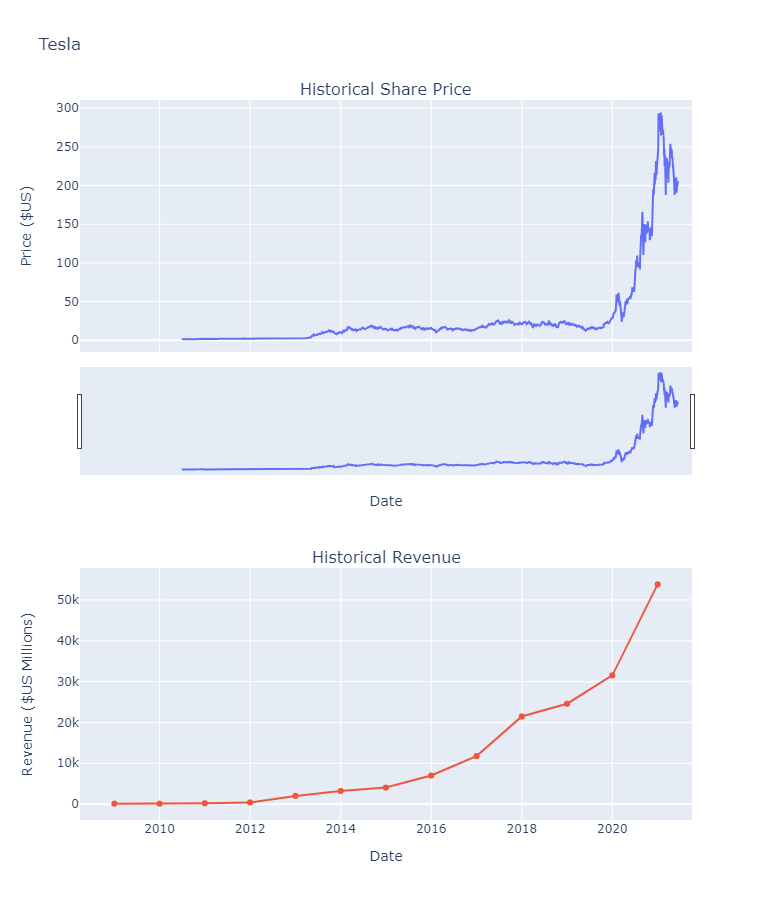

###   Question 6: Plot GameStop Stock Graph   ###


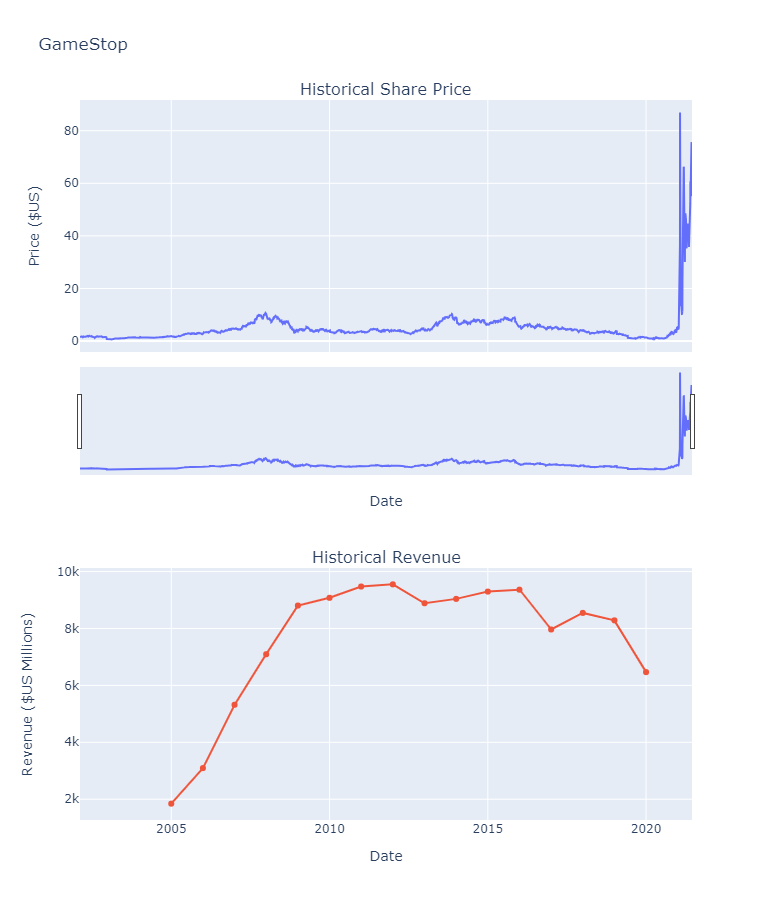

###   END   ###


In [43]:
#  PROJECT: Extracting and Visualizing Stock Data
#  AUTHOR: Sam Vongratana
#  NOTE:  Ticker Tesla (TSLA) and Gamestop (GME)

###   INITIALIZE   ###
!pip install yfinance==0.1.67
#!mamba install bs4==4.10.0 -y
#!pip install nbformat==4.2.0

import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

###   DEFINE   ###
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()


###   DEFINE TICKER SYBMOL   ###
tesla = yf.Ticker("TSLA")
gme = yf.Ticker("GME")


print("###   Question 1 - Tesla Reset_Index Head   ###")

tesla_data = tesla.history(period="max")

#print('###   Original Tesla_Data   ###')
#display(tesla_data.head())

#print('###   Tesla_Data after Reset_Index   ###')
tesla_data.reset_index(inplace=True)
display(tesla_data.head())



print("###   Question 2 - Webscrape and Tail   ###")
###   Use Beautiful Soup to parse data from webpage and display tail.   ###

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

soup = BeautifulSoup(html_data, 'html5lib')

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    tesla_revenue=tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index= True)
    ###   Clean data   ###
    tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

# display(tesla_revenue)
display(tesla_revenue.tail())


print("###   Question 3 - Extract Gamestop Stock Data with yFinance   ###")
###   Same as Q1 with Gamestop data   ###
gme_data = gme.history(period="max")

###   print('###   Original Gamestop_Data   ###')
# display(gme_data.head())

# print('###   Gamestop_Data after Reset_Index   ###')
gme_data.reset_index(inplace=True)
display(gme_data.head())



print("###   Question 4 - Webscrape GME Revenue Data   ###")
###   Use Beautiful Soup to parse data from webpage and display tail.   ###
gme_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(gme_url).text

soup = BeautifulSoup(html_data, 'html5lib')

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    gme_revenue=gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index= True)
    ###   Clean data   ###
    gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")
    
# display(gme_revenue)
display(gme_revenue.tail())


print("###   Question 5: Plot Tesla Stock Graph   ###")
make_graph(tesla_data, tesla_revenue, 'Tesla')


print("###   Question 6: Plot GameStop Stock Graph   ###")
make_graph(gme_data, gme_revenue, 'GameStop')


print("###   END   ###")